In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data

## Import

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
153,154,Female,38,78,76
144,145,Male,25,77,12
20,21,Male,35,24,35
64,65,Male,63,48,51
141,142,Male,32,75,93


In [3]:
dataset.describe(include='all')

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [4]:
X = dataset.iloc[:,1:].values

## Missing Data

In [5]:
dataset.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Encoding

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [7]:
X[:5]

array([['Male', 19, 15, 39],
       ['Male', 21, 15, 81],
       ['Female', 20, 16, 6],
       ['Female', 23, 16, 77],
       ['Female', 31, 17, 40]], dtype=object)

In [8]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X[:5]

array([[0.0, 1.0, 19, 15, 39],
       [0.0, 1.0, 21, 15, 81],
       [1.0, 0.0, 20, 16, 6],
       [1.0, 0.0, 23, 16, 77],
       [1.0, 0.0, 31, 17, 40]], dtype=object)

# Clustering

## Dendogram

In [9]:
from scipy.cluster import hierarchy as sch

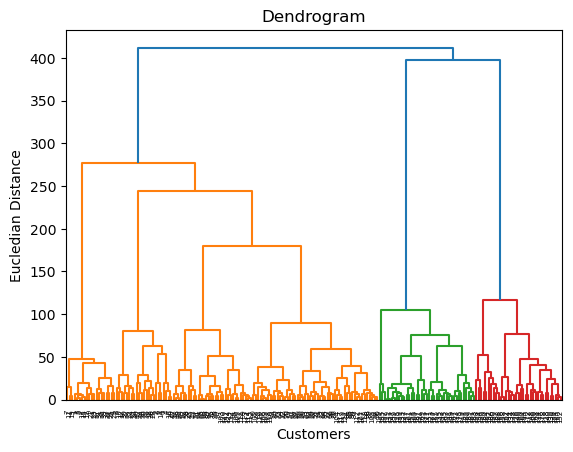

In [11]:
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Eucledian Distance')
plt.savefig('dendrogram.jpg')
plt.show();

## Training & predicting

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
hc = AgglomerativeClustering(n_clusters=6,metric='euclidean',linkage='ward')
y = hc.fit_predict(X)
y.shape

(200,)

## Visualising 

In [16]:
# Reducing to 2 dimensions
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

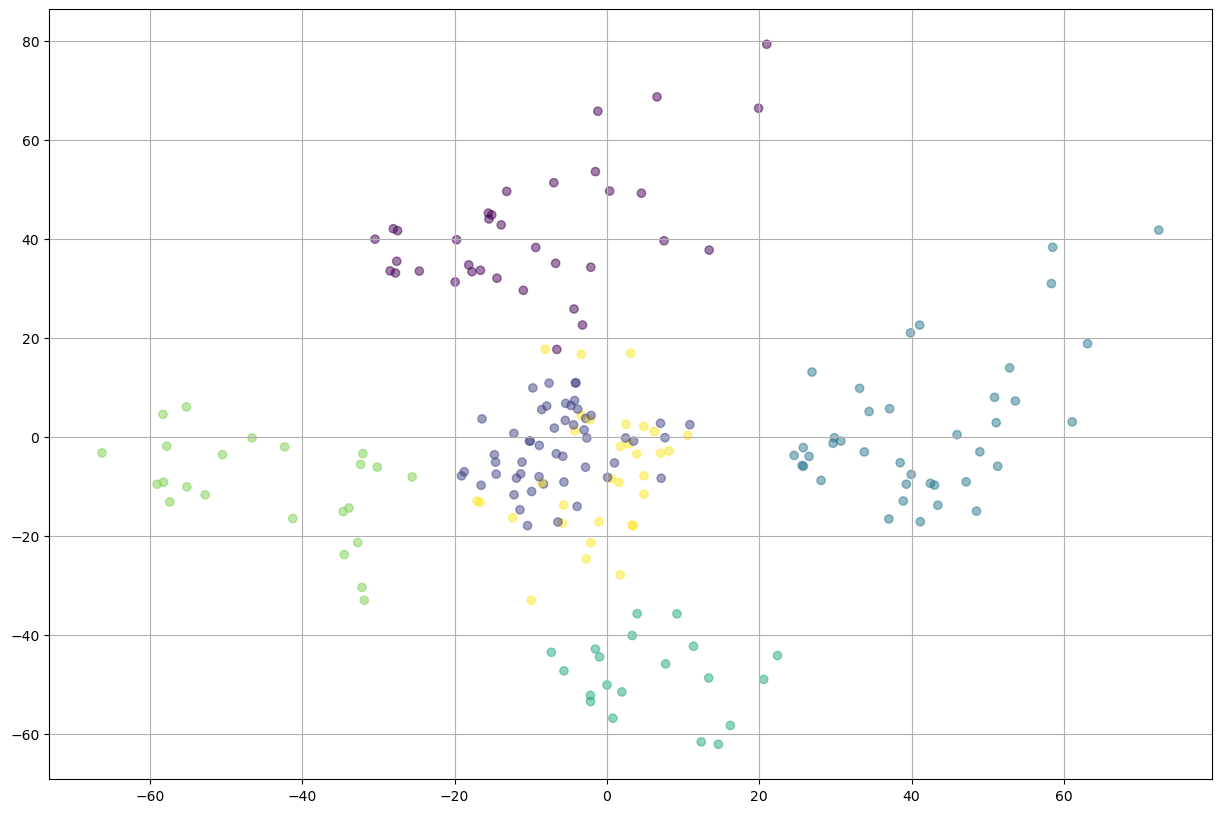

In [18]:
plt.figure(figsize=(15,10))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap='viridis',alpha=.5)
plt.grid()

In [19]:
dataset['cluster'] = y

In [21]:
dataset.pivot_table(values=['Age','Annual Income (k$)','Spending Score (1-100)'],
                    index=['cluster'],aggfunc=['median','max','min','mean'])

median                                           max  \
           Age Annual Income (k$) Spending Score (1-100) Age   
cluster                                                        
0         43.0               85.0                   16.0  59   
1         50.0               54.0                   49.0  70   
2         32.0               79.0                   83.0  40   
3         23.0               23.5                   78.0  35   
4         46.0               25.0                   17.0  67   
5         24.0               55.5                   51.5  35   

                                                  min                     \
        Annual Income (k$) Spending Score (1-100) Age Annual Income (k$)   
cluster                                                                    
0                      137                     39  19                 71   
1                       69                     60  32                 40   
2                      137                     97  27                 69   
3                       38                     99  18                 15   
4                       39                     40  19                 15   
5                       76                     65  18                 28   

                                     mean                     \
        Spending Score (1-100)        Age Annual Income (k$)   
cluster                                                        
0                            1  41.685714          88.228571   
1                           40  53.215686          55.117647   
2                           63  32.692308          86.538462   
3                           66  24.850000          24.950000   
4                            3  45.217391          26.304348   
5                           29  24.531250          54.187500   

                                
        Spending Score (1-100)  
cluster                         
0                    17.285714  
1                    49.470588  
2                    82.128205  
3                    81.000000  
4                    20.913043  
5                    50.250000

In [22]:
genre_summ = dataset.groupby(['cluster','Genre']).count()[['CustomerID']].unstack(level=1)['CustomerID']
genre_summ['Prop Fem'] = genre_summ['Female']/genre_summ.sum(axis=1)
genre_summ

Genre,Female,Male,Prop Fem
cluster,,,
0,15,20,0.428571
1,30,21,0.588235
2,21,18,0.538462
3,12,8,0.600000
4,14,9,0.608696
5,20,12,0.625000
